In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from netCDF4 import Dataset
import glob

In [2]:
datapath = '/Users/carmennab/Dropbox/alpha_retracker/data/validation/BGEP/'

bgep_lons = {}
bgep_lats = {}

bgep_buoys = ['ULS_A','ULS_B','ULS_D']
bgep_names = ['BGEP-A','BGEP-B','BGEP-D']

for buoy in bgep_buoys:
    bgep_lons[buoy] = np.array(Dataset(datapath+buoy+'/SIT_EASE_01Jan2010-31Jul2021.nc')['Longitude'])[:4138]
    bgep_lats[buoy] = np.array(Dataset(datapath+buoy+'/SIT_EASE_01Jan2010-31Jul2021.nc')['Latitude'])[:4138]

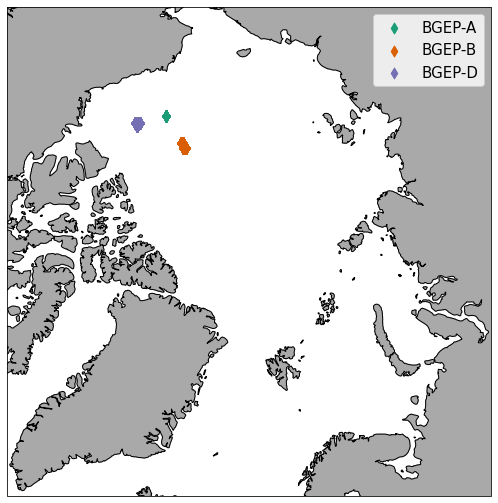

In [4]:
colors = ['#1b9e77','#d95f02','#7570b3']

fig = plt.figure(figsize=(9,9))

ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())

for c,buoy in enumerate(bgep_buoys):
    ax.scatter(bgep_lons[buoy],bgep_lats[buoy],c=colors[c],transform=ccrs.PlateCarree(),label=bgep_names[c],
               s=60,marker="d")

ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
ax.add_feature(cartopy.feature.OCEAN, color='white', edgecolor='black')
ax.set_extent([-180, 180, 90, 67], ccrs.PlateCarree())
ax.coastlines()
ax.legend(loc='upper right',fontsize=15)
plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/Alpha Retracker/supp_figs/buoy_locs.png',
            bbox_inches = "tight", dpi = 400)